In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_encoded = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_encoded.csv')   

In [3]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,High,Medium,High,Medium,1,0,1,"(30, 35]","(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,Low,High,Low,Medium,1,1,2,"(30, 35]","(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,Low,Medium,Low,Medium,2,1,1,"(30, 35]","(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,Low,Low,Medium,Medium,2,2,0,"(25, 30]","(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,Low,High,Low,Low,0,0,2,"(30, 35]","(30, 35]",Below 10


In [4]:
# Drop age_group column
df_encoded = df_encoded.drop(columns=['age_group'])

In [5]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,speciality_gc_cat,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,Medium,High,Medium,High,Medium,1,0,1,"(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,Medium,Low,High,Low,Medium,1,1,2,"(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,High,Low,Medium,Low,Medium,2,1,1,"(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,High,Low,Low,Medium,Medium,2,2,0,"(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,Low,Low,High,Low,Low,0,0,2,"(30, 35]",Below 10


In [6]:
# Split data
train_df = df_encoded[df_encoded['year_edition'] < 2024]
test_df = df_encoded[df_encoded['year_edition'] == 2024]
# Check the shape of the dataframes
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (1307, 63)
Test shape: (100, 63)


In [7]:
# display all rows and columns
pd.set_option('display.max_rows', None)

In [8]:
# List all columns 
print(df_encoded.columns.tolist())


['year_edition', 'rider_name', 'team', 'bib_number', 'nationality', 'birthdate', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'age', 'bmi', 'name_clean', 'rank', 'nat_AR', 'nat_AT', 'nat_AU', 'nat_BE', 'nat_CA', 'nat_CH', 'nat_CO', 'nat_CZ', 'nat_DE', 'nat_DK', 'nat_EE', 'nat_ER', 'nat_ES', 'nat_FR', 'nat_GB', 'nat_HR', 'nat_IE', 'nat_IT', 'nat_KZ', 'nat_LT', 'nat_LU', 'nat_LV', 'nat_NL', 'nat_NO', 'nat_NZ', 'nat_Other', 'nat_PL', 'nat_PT', 'nat_RU', 'nat_SI', 'nat_SK', 'nat_US', 'nat_ZA', 'climber_cat', 'speciality_climber_cat', 'speciality_gc_cat', 'speciality_sprint_cat', 'speciality_time_trial_cat', 'speciality_one_day_races_cat', 'speciality_hills_cat', 'speciality_gc_cat_num', 'speciality_climber_cat_num', 'speciality_time_trial_cat_num', 'age_group_adj', 'rank_group']


In [9]:
# drop all nat_columns
nat_columns = [col for col in df_encoded.columns if 'nat_' in col]  
df_encoded = df_encoded.drop(columns=nat_columns)
# Check the shape of the dataframe after dropping nat_columns
print(f"Shape after dropping nat_columns: {df_encoded.shape}")



Shape after dropping nat_columns: (1407, 30)


In [10]:
# List all columns 
print(df_encoded.columns.tolist())

['year_edition', 'rider_name', 'team', 'bib_number', 'nationality', 'birthdate', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'age', 'bmi', 'name_clean', 'rank', 'climber_cat', 'speciality_climber_cat', 'speciality_gc_cat', 'speciality_sprint_cat', 'speciality_time_trial_cat', 'speciality_one_day_races_cat', 'speciality_hills_cat', 'speciality_gc_cat_num', 'speciality_climber_cat_num', 'speciality_time_trial_cat_num', 'age_group_adj', 'rank_group']


In [11]:
# display all columns
pd.set_option('display.max_columns', None)


In [12]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,name_clean,rank,climber_cat,speciality_climber_cat,speciality_gc_cat,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,bernhard eisel,114.0,Low,Low,Medium,High,Medium,High,Medium,1,0,1,"(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,vasil kiryienka,112.0,Medium,Medium,Medium,Low,High,Low,Medium,1,1,2,"(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,264,1,939,476,33,21.222808,david lopez,111.0,Low,Medium,High,Low,Medium,Low,Medium,2,1,1,"(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,mikel nieve,18.0,High,High,High,Low,Low,Medium,Medium,2,2,0,"(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,926,0,126,25,35,21.329438,danny pate,113.0,Low,Low,Low,Low,High,Low,Low,0,0,2,"(30, 35]",Below 10


In [13]:
df_model = df_encoded.copy()

drop_cols = [
    'rider_name', 'team', 'name_clean', 'birthdate', 'nationality',
    'climber_cat', 'speciality_climber_cat', 'speciality_gc_cat',
    'speciality_sprint_cat', 'speciality_time_trial_cat', 'speciality_one_day_races_cat',
    'speciality_hills_cat', 'speciality_gc_cat_num', 'speciality_climber_cat_num',
    'speciality_time_trial_cat_num', 'age_group_adj', 'rank_group'
]

df_model.drop(columns=drop_cols, inplace=True)
df_model.head()


,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,2,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,3,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,4,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,5,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,6,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [14]:
# save the modified dataframe as a new CSV file
df_model.to_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_model.csv', index=False)

In [15]:
df_model.head()

,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,2,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,3,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,4,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,5,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,6,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [16]:
# Split the data into features and target variable
X = df_model.drop(columns=['rank'])  # Features
y = df_model['rank']                 # Target


In [17]:
train_mask = df_model['year_edition'] < 2024
test_mask = df_model['year_edition'] == 2024

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]


In [18]:
# Encode categorical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['year_edition']))  # drop year if you don't want to use it as numeric
X_test_scaled = scaler.transform(X_test.drop(columns=['year_edition']))


In [19]:
# Linear Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [20]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))



MAE: 16.75810785714286
RMSE: 21.760645879372575
R2: 0.7203070790141555


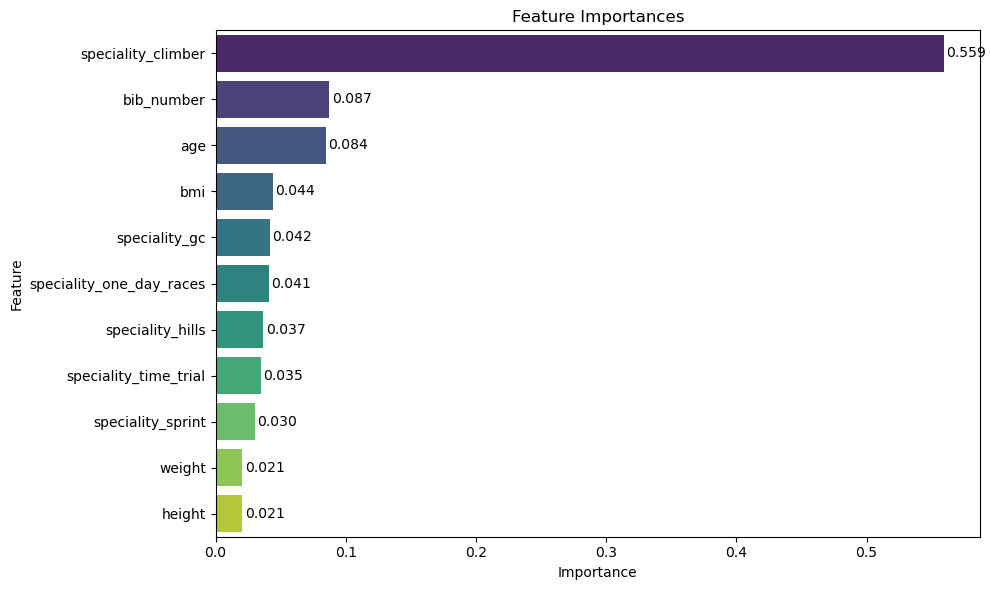

In [21]:
# Create importance_df if not already defined
importances = model.feature_importances_
feature_names = X_train.drop(columns=['year_edition']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Feature importance with value labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances')
plt.tight_layout()

# Add value labels to bars
for i, v in enumerate(importance_df.head(15)['Importance']):
    ax.text(v + 0.002, i, f"{v:.3f}", va='center')

plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": root_mean_squared_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    }

# Display results nicely
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                                 MAE       RMSE        R2
Linear Regression          21.301329  26.625846  0.581260
Random Forest              16.758108  21.760646  0.720307
Support Vector Regression  22.330410  27.377610  0.557280
Decision Tree              21.015000  28.112675  0.533188


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]  # fixed here
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV MAE:", -random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print('Test MAE:', mean_absolute_error(y_test, y_pred))
print('Test RMSE:', root_mean_squared_error(y_test, y_pred))
print('Test R2:', r2_score(y_test, y_pred))


Best parameters: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 101}
Best CV MAE: 23.61571961878798
Test MAE: 16.995613706373135
Test RMSE: 21.963925436087077
Test R2: 0.7150571047229255


In [24]:
# Check dimensions
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_train columns:", X_train.columns.tolist())
print("Number of columns in X_train:", len(X_train.columns))


X_train_scaled shape: (1307, 11)
X_train columns: ['year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'age', 'bmi']
Number of columns in X_train: 12


In [25]:
# Use only the column names that were actually scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.drop(columns=['year_edition']).columns)  # Only numerical columns!

In [26]:
# Drop 'height','weight' and 'speciality_climber' features
features_to_drop = ['height', 'weight', 'speciality_sprint']

In [27]:
# New training and testing sets without the dropped features
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)


In [28]:
# Scale the reduced training and testing sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_reduced = scaler.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler.transform(X_test_reduced)


In [29]:
# Wrap the selected features into a DataFrame
X_train_scaled_reduced_df = pd.DataFrame(X_train_scaled_reduced, columns=X_train_reduced.columns)
X_test_scaled_reduced_df = pd.DataFrame(X_test_scaled_reduced, columns=X_test_reduced.columns)


In [30]:
# Refit the model with the reduced features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled_reduced, y_train)

# Predict
y_pred = rf.predict(X_test_scaled_reduced)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")



MAE: 15.60
RMSE: 20.89
R2: 0.7421


In [31]:
# Define feature sets
# Full feature set (baseline)
X_train_full = X_train.copy()
X_test_full = X_test.copy()

# Manual removal 1
features_to_drop_1 = ['height', 'weight', 'speciality_sprint']
X_train_reduced_1 = X_train.drop(columns=features_to_drop_1)
X_test_reduced_1 = X_test.drop(columns=features_to_drop_1)

# Manual removal 2
features_to_drop_2 = ['speciality_one_day_races', 'speciality_time_trial', 'speciality_hills']
X_train_reduced_2 = X_train.drop(columns=features_to_drop_1 + features_to_drop_2)
X_test_reduced_2 = X_test.drop(columns=features_to_drop_1 + features_to_drop_2)


In [32]:
# Function to train and evaluate model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_and_evaluate(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2


In [33]:
# Best results from the full feature set: Random Forest Regressor and Reduced 1 set
# Compare results
results = {}

# Baseline
results['Full'] = train_and_evaluate(X_train_full, X_test_full, y_train, y_test)

# Without height, weight, sprint
results['Reduced 1'] = train_and_evaluate(X_train_reduced_1, X_test_reduced_1, y_train, y_test)

# Further reduced
results['Reduced 2'] = train_and_evaluate(X_train_reduced_2, X_test_reduced_2, y_train, y_test)

# Format results
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T
print(results_df)

                 MAE       RMSE        R2
Full       16.022496  20.940448  0.740994
Reduced 1  15.598520  20.894240  0.742136
Reduced 2  16.693288  21.964969  0.715030


In [34]:
model_features_full = X_train_full.columns.tolist()
model_features_reduced_1 = X_train_reduced_1.columns.tolist()
model_features_reduced_2 = X_train_reduced_2.columns.tolist()


In [35]:
print("Full feature set:", model_features_full)
print("Reduced 1 feature set:", model_features_reduced_1)
print("Reduced 2 feature set:", model_features_reduced_2)

Full feature set: ['year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'age', 'bmi']
Reduced 1 feature set: ['year_edition', 'bib_number', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_climber', 'speciality_hills', 'age', 'bmi']
Reduced 2 feature set: ['year_edition', 'bib_number', 'speciality_gc', 'speciality_climber', 'age', 'bmi']


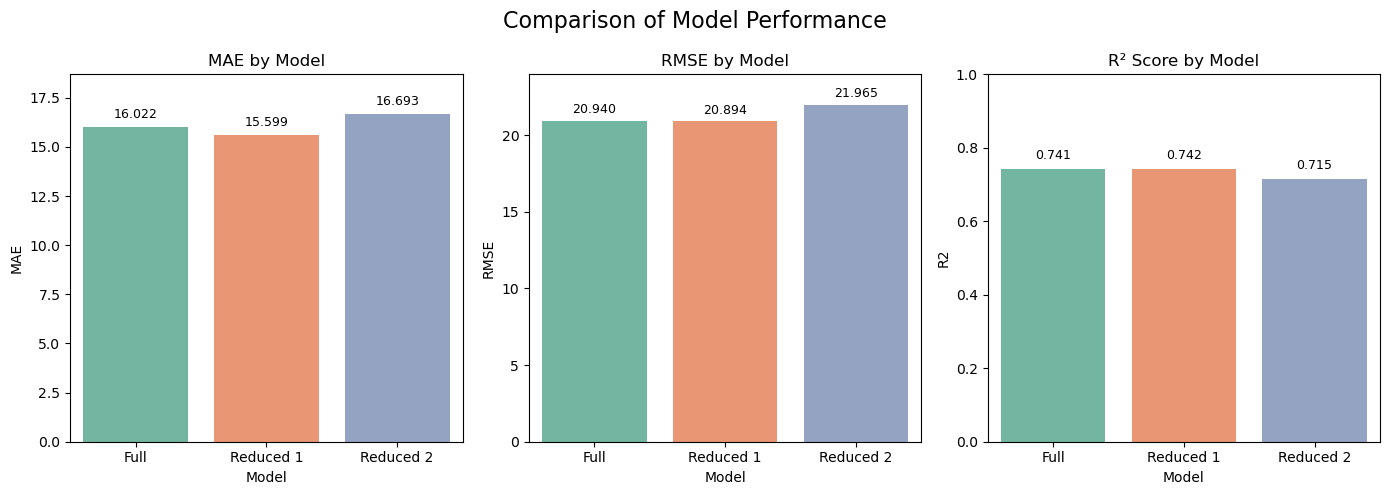

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df_plot = results_df.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(14, 5))

# MAE
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=results_df_plot, x='Model', y='MAE', hue='Model', palette='Set2', legend=False)
plt.title('MAE by Model')
plt.ylim(0, results_df_plot['MAE'].max() + 2)
for i, v in enumerate(results_df_plot['MAE']):
    ax1.text(i, v + 0.3, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

# RMSE
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=results_df_plot, x='Model', y='RMSE', hue='Model', palette='Set2', legend=False)
plt.title('RMSE by Model')
plt.ylim(0, results_df_plot['RMSE'].max() + 2)
for i, v in enumerate(results_df_plot['RMSE']):
    ax2.text(i, v + 0.3, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

# R²
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=results_df_plot, x='Model', y='R2', hue='Model', palette='Set2', legend=False)
plt.title('R² Score by Model')
plt.ylim(0, 1)
for i, v in enumerate(results_df_plot['R2']):
    ax3.text(i, v + 0.02, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

plt.suptitle('Comparison of Model Performance', fontsize=16)
plt.tight_layout()
plt.show()


In [37]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
# XGBoost 
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the model
xgb_reg = xgb.XGBRegressor(random_state=42, verbosity=0)

# Train on your training data
xgb_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = xgb_reg.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False -> RMSE
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")
print(f"XGBoost R2: {r2:.4f}")


XGBoost MAE: 19.2892
XGBoost RMSE: 24.8680
XGBoost R2: 0.6347


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
# XGBoost evaluation on different feature sets

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import warnings


def xgb_train_eval(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb_reg = xgb.XGBRegressor(random_state=42, verbosity=0)
    xgb_reg.fit(X_train_scaled, y_train)
    
    y_pred = xgb_reg.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)  # use new function here
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

xgb_results = {}

# Full feature set
xgb_results['Full'] = xgb_train_eval(X_train_full, X_test_full, y_train, y_test)

# Reduced 1
xgb_results['Reduced 1'] = xgb_train_eval(X_train_reduced_1, X_test_reduced_1, y_train, y_test)

# Reduced 2
xgb_results['Reduced 2'] = xgb_train_eval(X_train_reduced_2, X_test_reduced_2, y_train, y_test)
warnings.filterwarnings('ignore')
# Display results
xgb_results_df = pd.DataFrame(xgb_results, index=['MAE', 'RMSE', 'R2']).T
print("XGBoost results on different feature sets:")
print(xgb_results_df)

XGBoost results on different feature sets:
                 MAE       RMSE        R2
Full       17.109406  21.965306  0.715021
Reduced 1  17.587244  22.456682  0.702128
Reduced 2  18.139539  23.117140  0.684350


In [40]:
# Load 2025 Tour de France participants data
df_2025 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\notebooks\tdf_2025_startlist_full_details.csv')
# Display the first few rows of the dataframe
df_2025.head()

,name,rider_url,team,team_url,bib_number,nationality,birthdate,place_of_birth,height,weight,pcs_rank,uci_world_rank,one_day_races,gc,time_trial,sprint,climber,hills
0,CARAPAZ Richard,richard-carapaz,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,EC,1993-5-29,El Carmelo,1.70,62.0,NaN,NaN,1262,4060,551,88,4822,1735
1,SWEENY Harry,harry-sweeny,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,AU,1998-7-9,Warwick,1.86,75.0,NaN,NaN,177,228,159,63,107,251
2,POWLESS Neilson,neilson-powless,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,US,1996-9-3,Eglin,1.83,67.0,NaN,NaN,2607,1569,891,238,1678,1109
3,HEALY Ben,ben-healy,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,IE,2000-9-11,Kingswinford,1.75,65.0,NaN,NaN,1284,504,470,40,957,480
4,POGAČAR Tadej,tadej-pogacar,UAE Team Emirates - XRG (WT),team/uae-team-emirates-xrg-2025,NaN,SI,1998-9-21,Klanec,1.76,66.0,NaN,NaN,7677,6844,2703,194,8498,3706


In [41]:
df_model.head()

,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,2,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,3,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,4,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,5,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,6,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [42]:
# For df_2025 add the year_edition column
df_2025['year_edition'] = 2025

In [43]:
# Calculate the age of each rider in 2025
from datetime import datetime
df_2025['age'] = 2025 - pd.to_datetime(df_2025['birthdate']).dt.year

In [44]:
# Calculate BMI for each rider in 2025
df_2025['bmi'] = df_2025['weight'] / (df_2025['height'] ** 2)


In [45]:
# Set a temporary placeholder for bib_number
median_bib = df_model['bib_number'].median()
df_2025['bib_number'] = median_bib


In [46]:
# Drop unnecessary columns
df_2025 = df_2025.drop(columns=['nationality', 'birthdate', 'rider_url', 'team_url', 'birthdate', 'place_of_birth', 'pcs_rank', 'uci_world_rank'])


In [47]:
# Rename columns to match the model's expected input
df_2025 = df_2025.rename(columns={
    'one_day_races': 'speciality_one_day_races',
    'gc': 'speciality_gc',
    'time_trial': 'speciality_time_trial',
    'sprint': 'speciality_sprint',
    'climber': 'speciality_climber',
    'hills': 'speciality_hills'
})


In [48]:
df_2025.head()

,name,team,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,year_edition,age,bmi
0,CARAPAZ Richard,EF Education - EasyPost (WT),107.0,1.70,62.0,1262,4060,551,88,4822,1735,2025,32,21.453287
1,SWEENY Harry,EF Education - EasyPost (WT),107.0,1.86,75.0,177,228,159,63,107,251,2025,27,21.678807
2,POWLESS Neilson,EF Education - EasyPost (WT),107.0,1.83,67.0,2607,1569,891,238,1678,1109,2025,29,20.006569
3,HEALY Ben,EF Education - EasyPost (WT),107.0,1.75,65.0,1284,504,470,40,957,480,2025,25,21.224490
4,POGAČAR Tadej,UAE Team Emirates - XRG (WT),107.0,1.76,66.0,7677,6844,2703,194,8498,3706,2025,27,21.306818


In [49]:
# Create X_2025 for prediction without the name column
model_features = ['year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races',
                  'speciality_gc', 'speciality_time_trial', 'speciality_sprint',
                  'speciality_climber', 'speciality_hills', 'age', 'bmi']

X_2025 = df_2025[model_features]


In [50]:
model_features = model_features_reduced_1

In [51]:
X_2025 = df_2025[model_features]

In [52]:
X_2025_scaled = scaler.transform(X_2025)


In [53]:
df_2025['predicted_rank'] = rf.predict(X_2025_scaled)
print("Predicted ranks for 2025 participants:")
print(df_2025[['predicted_rank']].head())
print("Available columns:", df_2025.columns.tolist())

Predicted ranks for 2025 participants:
   predicted_rank
0           17.59
1          116.09
2           44.38
3           67.00
4           12.85
Available columns: ['name', 'team', 'bib_number', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'year_edition', 'age', 'bmi', 'predicted_rank']


In [54]:
top_riders = df_2025[['name', 'team', 'predicted_rank']].sort_values(by='predicted_rank')
print(top_riders.head(10))  # Show top 10


                name                                  team  predicted_rank
41  VINGEGAARD Jonas        Team Visma | Lease a Bike (WT)            7.91
4      POGAČAR Tadej          UAE Team Emirates - XRG (WT)           12.85
68       GAUDU David                   Groupama - FDJ (WT)           13.75
16  VLASOV Aleksandr      Red Bull - BORA - hansgrohe (WT)           14.95
74         MAS Enric                    Movistar Team (WT)           15.41
5       ALMEIDA João          UAE Team Emirates - XRG (WT)           16.21
83      O'CONNOR Ben                 Team Jayco AlUla (WT)           16.28
48  RODRÍGUEZ Carlos                 INEOS Grenadiers (WT)           16.46
6         YATES Adam          UAE Team Emirates - XRG (WT)           16.53
13        GALL Felix  Decathlon AG2R La Mondiale Team (WT)           17.05


In [55]:
df_2025['predicted_rank_rounded'] = df_2025['predicted_rank'].round()


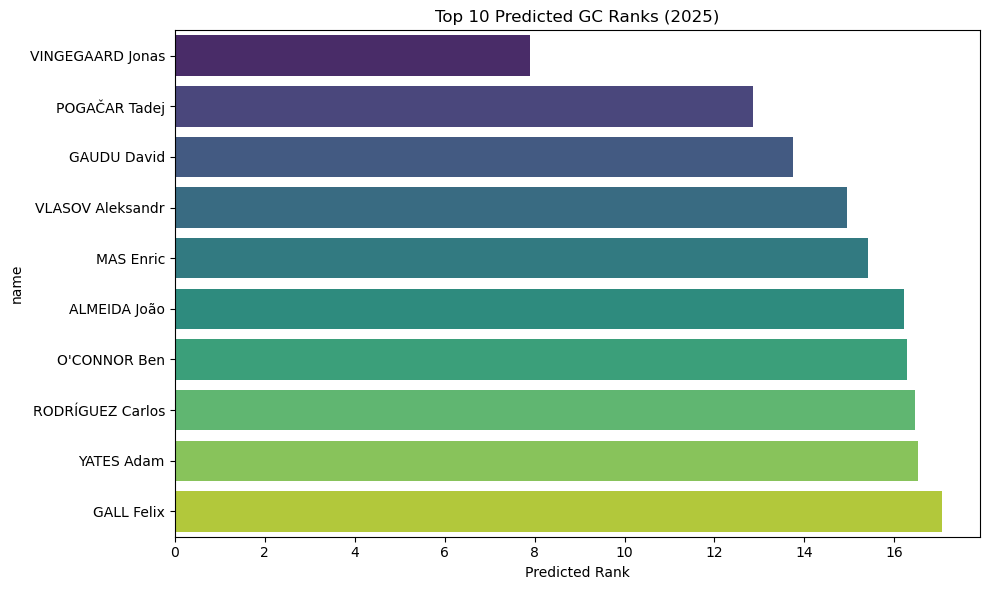

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = top_riders.head(10)

# Sort names by predicted rank ascending (so rank 1 is at the top)
name_order = top10.sort_values(by='predicted_rank')['name']

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='predicted_rank', y='name', hue='name', palette='viridis', legend=False, order=name_order)
plt.xlabel('Predicted Rank')
plt.title('Top 10 Predicted GC Ranks (2025)')
plt.tight_layout()
plt.show()



In [57]:
df_2025['predicted_rank'].describe()


count    117.000000
mean      66.994375
std       34.531150
min        7.910000
25%       38.256000
50%       61.205000
75%       99.090000
max      131.810000
Name: predicted_rank, dtype: float64

In [58]:
# Shift and rescale predictions to stretch range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 150))  # Adjust to realistic GC ranks
df_2025['predicted_rank_rescaled'] = scaler.fit_transform(df_2025[['predicted_rank']])


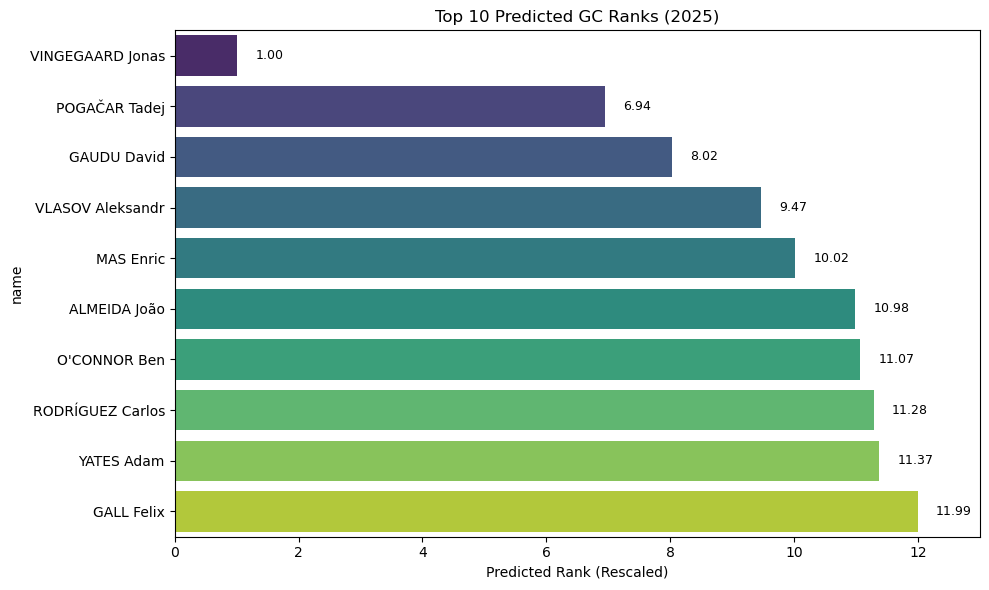

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare top 10 riders
top_riders = df_2025[['name', 'team', 'predicted_rank', 'predicted_rank_rescaled']].sort_values(by='predicted_rank')
top10 = top_riders.head(10)
name_order = top10.sort_values(by='predicted_rank_rescaled')['name'].tolist()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    x='predicted_rank_rescaled',
    y='name',
    hue='name',
    palette='viridis',
    legend=False,
    order=name_order,
)

# Add value labels to bars
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.3, y, f"{width:.2f}", va='center', ha='left', fontsize=9, color='black')

# Adjust limits and labels
plt.xlim(0, 13)  # Ensures space for label
plt.xlabel('Predicted Rank (Rescaled)')
plt.title('Top 10 Predicted GC Ranks (2025)')
plt.tight_layout()
plt.show()


In [60]:
# List rankings as a DataFrame
df_sorted = df_2025[['name', 'team', 'predicted_rank', 'predicted_rank_rescaled']].sort_values(by='predicted_rank_rescaled')
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head(10)

,name,team,predicted_rank,predicted_rank_rescaled
0,VINGEGAARD Jonas,Team Visma | Lease a Bike (WT),7.91,1.000000
1,POGAČAR Tadej,UAE Team Emirates - XRG (WT),12.85,6.940759
2,GAUDU David,Groupama - FDJ (WT),13.75,8.023083
3,VLASOV Aleksandr,Red Bull - BORA - hansgrohe (WT),14.95,9.466182
4,MAS Enric,Movistar Team (WT),15.41,10.019370
5,ALMEIDA João,UAE Team Emirates - XRG (WT),16.21,10.981437
6,O'CONNOR Ben,Team Jayco AlUla (WT),16.28,11.065617
7,RODRÍGUEZ Carlos,INEOS Grenadiers (WT),16.46,11.282082
8,YATES Adam,UAE Team Emirates - XRG (WT),16.53,11.366263
9,GALL Felix,Decathlon AG2R La Mondiale Team (WT),17.05,11.991606


In [61]:
# Assuming df_2025 has a column 'predicted_rank' with continuous predicted values

# Sort by predicted rank ascending (best first)
df_2025_sorted = df_2025.sort_values(by='predicted_rank').reset_index(drop=True)

# Assign consecutive predicted positions (1, 2, 3, ...)
df_2025_sorted['predicted_position'] = range(1, len(df_2025_sorted) + 1)

# Optional: Round predicted_rank for readability (but keep predicted_position for ranking)
df_2025_sorted['predicted_rank_rounded'] = df_2025_sorted['predicted_rank'].round(2)

# Show top 10 as example
print(df_2025_sorted[['name', 'predicted_rank_rounded', 'predicted_position']].head(10))


               name  predicted_rank_rounded  predicted_position
0  VINGEGAARD Jonas                    7.91                   1
1     POGAČAR Tadej                   12.85                   2
2       GAUDU David                   13.75                   3
3  VLASOV Aleksandr                   14.95                   4
4         MAS Enric                   15.41                   5
5      ALMEIDA João                   16.21                   6
6      O'CONNOR Ben                   16.28                   7
7  RODRÍGUEZ Carlos                   16.46                   8
8        YATES Adam                   16.53                   9
9        GALL Felix                   17.05                  10


In [62]:
df_2025_sorted.head()

,name,team,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,year_edition,age,bmi,predicted_rank,predicted_rank_rounded,predicted_rank_rescaled,predicted_position
0,VINGEGAARD Jonas,Team Visma | Lease a Bike (WT),107.0,1.75,58.0,320,5026,2064,34,4390,1561,2025,29,18.938776,7.91,7.91,1.000000,1
1,POGAČAR Tadej,UAE Team Emirates - XRG (WT),107.0,1.76,66.0,7677,6844,2703,194,8498,3706,2025,27,21.306818,12.85,12.85,6.940759,2
2,GAUDU David,Groupama - FDJ (WT),107.0,1.72,53.0,1762,3136,160,17,4052,1214,2025,29,17.915089,13.75,13.75,8.023083,3
3,VLASOV Aleksandr,Red Bull - BORA - hansgrohe (WT),107.0,1.86,68.0,1438,3649,1094,96,4040,1438,2025,29,19.655451,14.95,14.95,9.466182,4
4,MAS Enric,Movistar Team (WT),107.0,1.77,61.0,993,4995,666,19,5690,1364,2025,30,19.470778,15.41,15.41,10.019370,5


In [63]:
# Show only name, predicted_rank_rounded, predicted_rank_rescaled, predicted_position
df_2025_sorted[['name', 'predicted_rank_rounded', 'predicted_rank_rescaled', 'predicted_position']].head(21)

,name,predicted_rank_rounded,predicted_rank_rescaled,predicted_position
0,VINGEGAARD Jonas,7.91,1.000000,1
1,POGAČAR Tadej,12.85,6.940759,2
2,GAUDU David,13.75,8.023083,3
3,VLASOV Aleksandr,14.95,9.466182,4
4,MAS Enric,15.41,10.019370,5
5,ALMEIDA João,16.21,10.981437,6
6,O'CONNOR Ben,16.28,11.065617,7
7,RODRÍGUEZ Carlos,16.46,11.282082,8
8,YATES Adam,16.53,11.366263,9
9,GALL Felix,17.05,11.991606,10


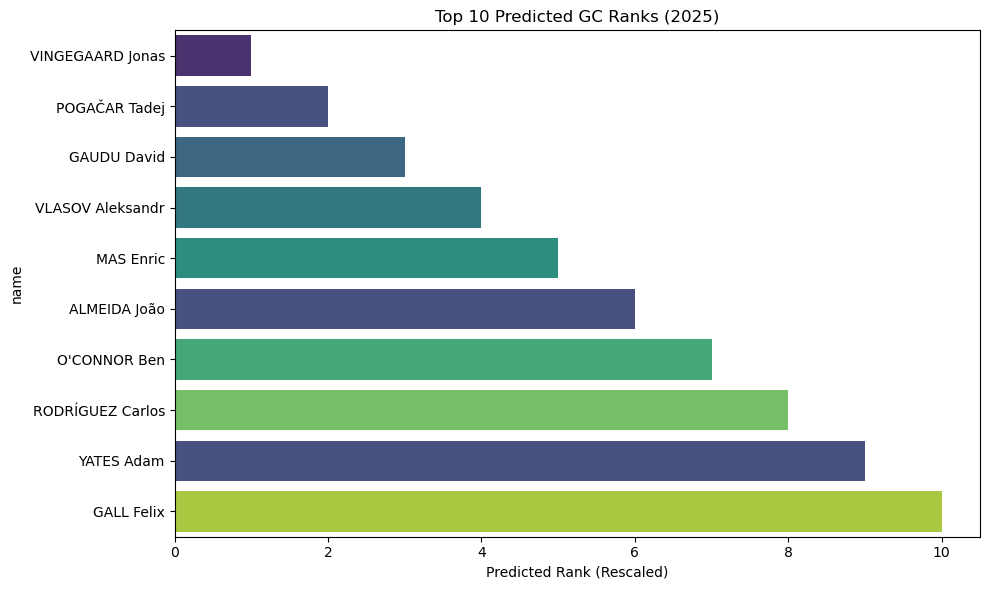

In [64]:
# Plot the top 10 predicted ranks
import seaborn as sns
plt.figure(figsize=(10, 6))
top10 = df_2025_sorted.head(10)
sns.barplot(data=top10, x='predicted_position', y='name', hue='team', palette='viridis', legend=False)
plt.xlabel('Predicted Rank (Rescaled)')
plt.title('Top 10 Predicted GC Ranks (2025)')
plt.tight_layout()
plt.show()

In [65]:
print(y_train.value_counts().sort_index().head(10))

rank
1.0     10
2.0     10
3.0     10
4.0     10
5.0      9
6.0      9
7.0     10
8.0      9
9.0      8
10.0    10
Name: count, dtype: int64


In [66]:
df_model.head()

,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,2,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,3,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,4,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,5,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,6,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [67]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year_edition              1407 non-null   int64  
 1   bib_number                1407 non-null   int64  
 2   height                    1407 non-null   float64
 3   weight                    1407 non-null   float64
 4   speciality_one_day_races  1407 non-null   int64  
 5   speciality_gc             1407 non-null   int64  
 6   speciality_time_trial     1407 non-null   int64  
 7   speciality_sprint         1407 non-null   int64  
 8   speciality_climber        1407 non-null   int64  
 9   speciality_hills          1407 non-null   int64  
 10  age                       1407 non-null   int64  
 11  bmi                       1407 non-null   float64
 12  rank                      1407 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 143.0 KB


In [68]:
# Show number of rows and columns
print(f"Number of rows: {df_model.shape[0]}, Number of columns: {df_model.shape[1]}")

Number of rows: 1407, Number of columns: 13


In [69]:
print(df_model['rank'].describe())

count    1407.000000
mean       73.210377
std        44.375753
min         1.000000
25%        34.000000
50%        72.000000
75%       110.000000
max       175.000000
Name: rank, dtype: float64


Summary statistics for df_model['rank']:

count    1407.000000
mean       73.210377
std        44.375753
min         1.000000
25%        34.000000
50%        72.000000
75%       110.000000
max       175.000000
Name: rank, dtype: float64


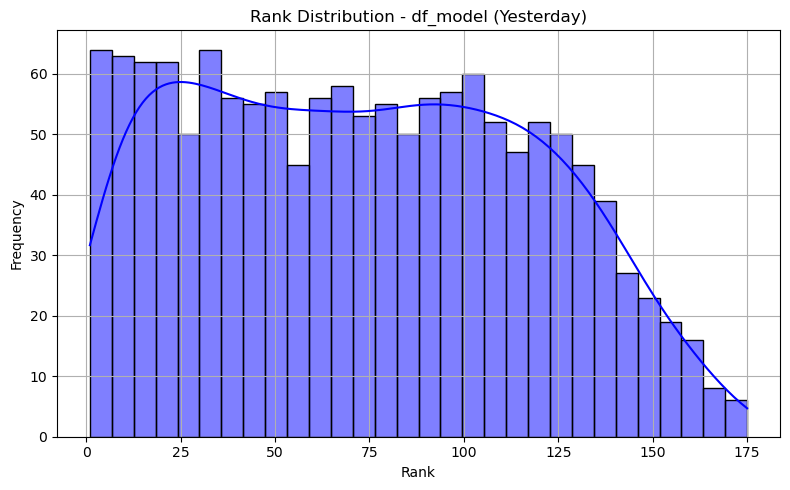

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics for df_model['rank']:\n")
print(df_model['rank'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_model['rank'], bins=30, kde=True, color='blue')
plt.title("Rank Distribution - df_model (Yesterday)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## Add live odds as feature

In [71]:
pip install selenium webdriver-manager


Note: you may need to restart the kernel to use updated packages.
